# Inladen packages  & dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn import linear_model

df=pd.read_excel("Complete-dataset-FINAL.xlsx")

In [3]:
df.head()

,Method name,N (no. labs),Mean,Bias,CV,Sample,Reference Value,Year,Source (CAP/EurA1c),Type (Fresh/frozen),Manufacturer,Total Error
0,Vitros 5.1 FS. 4600. 5600,183,6.14,-0.16,2.3,GH2-04,6.3,2011,CAP,Fresh,Vitros,4.348
1,Vitros 5.1 FS. 4600. 5600,183,7.59,-0.01,2.5,GH2-05,7.6,2011,CAP,Fresh,Vitros,4.890
2,Vitros 5.1 FS. 4600. 5600,183,9.42,0.22,3.0,GH2-06,9.2,2011,CAP,Fresh,Vitros,6.100
3,Vitros 5.1 FS. 4600. 5600,210,5.42,-0.18,2.3,GH2-01,5.6,2012,CAP,Fresh,Vitros,4.328
4,Vitros 5.1 FS. 4600. 5600,210,9.34,-0.06,2.6,GH2-02,9.4,2012,CAP,Fresh,Vitros,5.036


# Business understanding

Deelvraag: Hoe verandert een merk over de jaren heen? (voorspelling total error)


Voor het Isala ziekenhuis is het van belang om inzicht te hebben hoe verschillende metingen worden uitgevoerd. Door voorspellingen te doen, zou het Isala ziekenhuis tijdig kunnen ingrijpen. Doordat sommige meetmehodes maar één keer in het rapport voorkomen, focussen we ons eerst op de fabrikant.


# Data understanding
Welke databronnen zijn gegeven en in welk formaat:
Een excel bestand genaamd: Complete-dataset.xlsx

Hoe groot zijn deze databronnen:
291 kB

-4684 rows

-12 cols

Het aantal metingen per merk verschilt enorm. Daarom wordt er nu gefocust op de top 10 merken met de meeste metingen.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4684 entries, 0 to 4683
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Method name          4684 non-null   object 
 1   N (no. labs)         4684 non-null   object 
 2   Mean                 4602 non-null   float64
 3   Bias                 4058 non-null   float64
 4   CV                   4584 non-null   float64
 5   Sample               4684 non-null   object 
 6   Reference Value      4656 non-null   float64
 7   Year                 4684 non-null   int64  
 8   Source (CAP/EurA1c)  4684 non-null   object 
 9   Type (Fresh/frozen)  4684 non-null   object 
 10  Manufacturer         4684 non-null   object 
 11  Total Error          4684 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 439.2+ KB


In [5]:
df.isna().sum()
#Bias, CV? Leeg -> Geen total error
df.dropna()

,Method name,N (no. labs),Mean,Bias,CV,Sample,Reference Value,Year,Source (CAP/EurA1c),Type (Fresh/frozen),Manufacturer,Total Error
0,Vitros 5.1 FS. 4600. 5600,183,6.14,-0.16,2.3,GH2-04,6.30,2011,CAP,Fresh,Vitros,4.348
1,Vitros 5.1 FS. 4600. 5600,183,7.59,-0.01,2.5,GH2-05,7.60,2011,CAP,Fresh,Vitros,4.890
2,Vitros 5.1 FS. 4600. 5600,183,9.42,0.22,3.0,GH2-06,9.20,2011,CAP,Fresh,Vitros,6.100
3,Vitros 5.1 FS. 4600. 5600,210,5.42,-0.18,2.3,GH2-01,5.60,2012,CAP,Fresh,Vitros,4.328
4,Vitros 5.1 FS. 4600. 5600,210,9.34,-0.06,2.6,GH2-02,9.40,2012,CAP,Fresh,Vitros,5.036
...,...,...,...,...,...,...,...,...,...,...,...,...
4679,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,204,9.08,0.22,3.1,GH5-01,8.86,2021,CAP,Fresh,Vitros,6.296
4680,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,204,6.86,0.02,2.6,GH5-02,6.84,2021,CAP,Fresh,Vitros,5.116
4681,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,204,9.40,0.01,3.4,GH5-03,9.39,2021,CAP,Fresh,Vitros,6.674
4682,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,204,6.14,0.01,2.5,GH5-04,6.13,2021,CAP,Fresh,Vitros,4.910


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mean,4602.0,7.388795,1.896549,4.60,5.78,7.100,8.7000,19.200
Bias,4058.0,0.073361,0.650975,-6.90,-0.09,0.020,0.1300,6.500
CV,4584.0,2.972033,1.420669,0.50,2.10,2.700,3.5000,17.100
Reference Value,4656.0,7.361971,1.864492,4.92,5.80,7.100,8.6500,13.000
Year,4684.0,2015.568531,4.261448,2006.00,2013.00,2017.000,2019.0000,2021.000
Total Error,4684.0,5.764378,2.975016,0.00,3.98,5.196,6.8025,28.216


In [7]:
#Hoeveel metingen per merk
df["Manufacturer"].value_counts()


Siemens                      991
Bio-Rad                      788
Roche Diagnostics            674
Beckman Coulter              384
Tosoh                        349
Abbott                       310
Sebia                        203
Trinity Biotech              188
Vitros                       164
Alere                        121
Arkray                        95
Axis-Shield                   57
Menarini                      52
Roche Diagnostics/Hitachi     42
Primus                        42
Bayer                         36
Metrika                       30
Olympus                       30
Synchron                      24
Not specified                 20
JEOL                          15
Bayer/Metrika                 15
Dade Behring                  15
HemoCue                        6
Medinor                        6
Sysmex                         4
Thermo Scientific              4
BioMajesty                     4
Lifotronic                     4
EKF Diagnostics                4
Fisher    

In [8]:
#Hoeveel unieke merken
df["Manufacturer"].nunique()

33

# Data preparation

In [9]:
manufacturers = df.groupby("Manufacturer")
manufacturers.size().nlargest(20)

Manufacturer
Siemens                      991
Bio-Rad                      788
Roche Diagnostics            674
Beckman Coulter              384
Tosoh                        349
Abbott                       310
Sebia                        203
Trinity Biotech              188
Vitros                       164
Alere                        121
Arkray                        95
Axis-Shield                   57
Menarini                      52
Primus                        42
Roche Diagnostics/Hitachi     42
Bayer                         36
Metrika                       30
Olympus                       30
Synchron                      24
Not specified                 20
dtype: int64

In [10]:
#no space between columns names for predictions
df.columns = df.columns.str.replace('Total Error', 'Total')
df.columns

Index(['Method name', 'N (no. labs)', 'Mean', 'Bias', 'CV', 'Sample',
       'Reference Value', 'Year', 'Source (CAP/EurA1c)', 'Type (Fresh/frozen)',
       'Manufacturer', 'Total'],
      dtype='object')

In [11]:
list_top10 = df['Manufacturer'].value_counts()[:10].index.tolist()
top10_manufacturers = df.loc[df['Manufacturer'].isin(list_top10)]
top10_manufacturers['Manufacturer'].value_counts()
top10_manufacturers = top10_manufacturers.dropna()


In [12]:
Siemens = top10_manufacturers[top10_manufacturers['Manufacturer'] == 'Siemens']
Siemens.shape

(918, 12)

In [13]:
top10_manufacturers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3737 entries, 0 to 4683
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Method name          3737 non-null   object 
 1   N (no. labs)         3737 non-null   object 
 2   Mean                 3737 non-null   float64
 3   Bias                 3737 non-null   float64
 4   CV                   3737 non-null   float64
 5   Sample               3737 non-null   object 
 6   Reference Value      3737 non-null   float64
 7   Year                 3737 non-null   int64  
 8   Source (CAP/EurA1c)  3737 non-null   object 
 9   Type (Fresh/frozen)  3737 non-null   object 
 10  Manufacturer         3737 non-null   object 
 11  Total                3737 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 379.5+ KB


<AxesSubplot:xlabel='Year', ylabel='Total'>

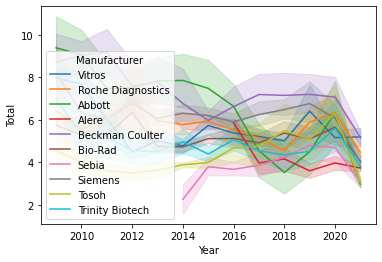

In [14]:
sns.lineplot(x="Year", y="Total",
             hue="Manufacturer", 
             data=top10_manufacturers)

# Modeling

In [15]:
#model regressie trainen en testen
#R2 zegt iets over de bruikbaarheid van je model
traindata, testdata = train_test_split(Siemens, train_size=0.65, test_size=0.35, random_state=42)

#eerst afhankelijke variabele, dus hierbij 'Year'
mod1 = ols(formula='Year ~ Total', data=traindata).fit()
print(mod1.summary())

#weer afhankelijke variable
print(testdata["Year"].corr(mod1.predict(testdata)) **2)

                            OLS Regression Results                            
Dep. Variable:                   Year   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     7.535
Date:                Tue, 24 May 2022   Prob (F-statistic):            0.00623
Time:                        14:27:02   Log-Likelihood:                -1560.1
No. Observations:                 596   AIC:                             3124.
Df Residuals:                     594   BIC:                             3133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2016.5800      0.378   5329.345      0.0

In [16]:
#make prediction till 2022
# df_test = pd.DataFrame(columns=['Method name', 'N (no. labs)', 'Mean', 'Bias', 'CV', 'Sample',
#        'Reference Value', 'Year', 'Source (CAP/EurA1c)', 'Type (Fresh/frozen)',
#        'Manufacturer', 'Total'])
df_test = top10_manufacturers
manufacturers = top10_manufacturers.groupby("Manufacturer")

#statmodel
for name, data in manufacturers:
    tempdf = data[['Year', 'Total']].dropna()

    X = tempdf.iloc[:, :-1].values
    Y = tempdf.iloc[:, 1].values

    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train, Y_train)    
    predicted_values = model.predict(X_test)

    predicted_df= pd.DataFrame(predicted_values, columns=["Total"])    
    predicted_df["Year"] = 2022    
    predicted_df["Manufacturer"] = name
    df_test= pd.concat([predicted_df, df_test], axis=0, ignore_index=True)
    tempdf = pd.concat([tempdf, predicted_df], axis=0, ignore_index=True)
    
    # plt.plot(X_test,model.coef_ * X_test + model.intercept_, linewidth=1)
#     sns.set(rc = {'figure.figsize':(25,8)})
#     l = sns.lineplot(x='Year', y='Total', data=tempdf)
#     l.set_title(name)
    # plt.show()
    print("R2: ", model.score(X, Y))

R2:  0.09928637568437482
R2:  0.01732021831785102
R2:  0.059175082445234284
R2:  0.0026936379199792304
R2:  0.008583681103058405
R2:  0.0055900854545645196
R2:  0.015322834140319541
R2:  0.027158630505418002
R2:  0.0060299480968488695
R2:  0.03381336493891429


In [17]:
df_test.head()

,Total,Year,Manufacturer,Method name,N (no. labs),Mean,Bias,CV,Sample,Reference Value,Source (CAP/EurA1c),Type (Fresh/frozen)
0,5.722790,2022,Vitros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.318252,2022,Vitros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.115983,2022,Vitros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.217117,2022,Vitros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.520521,2022,Vitros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_test= pd.concat([top10_manufacturers, df_test], axis=0, ignore_index=True)
df_test[df_test['Year']==2022]

,Method name,N (no. labs),Mean,Bias,CV,Sample,Reference Value,Year,Source (CAP/EurA1c),Type (Fresh/frozen),Manufacturer,Total
3737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Vitros,5.722790
3738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Vitros,5.318252
3739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Vitros,5.115983
3740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Vitros,5.217117
3741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Vitros,5.520521
...,...,...,...,...,...,...,...,...,...,...,...,...
5231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Abbott,5.145424
5232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Abbott,7.624671
5233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Abbott,6.632972
5234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Abbott,6.137123


In [19]:
df_test = df_test.groupby("Manufacturer")


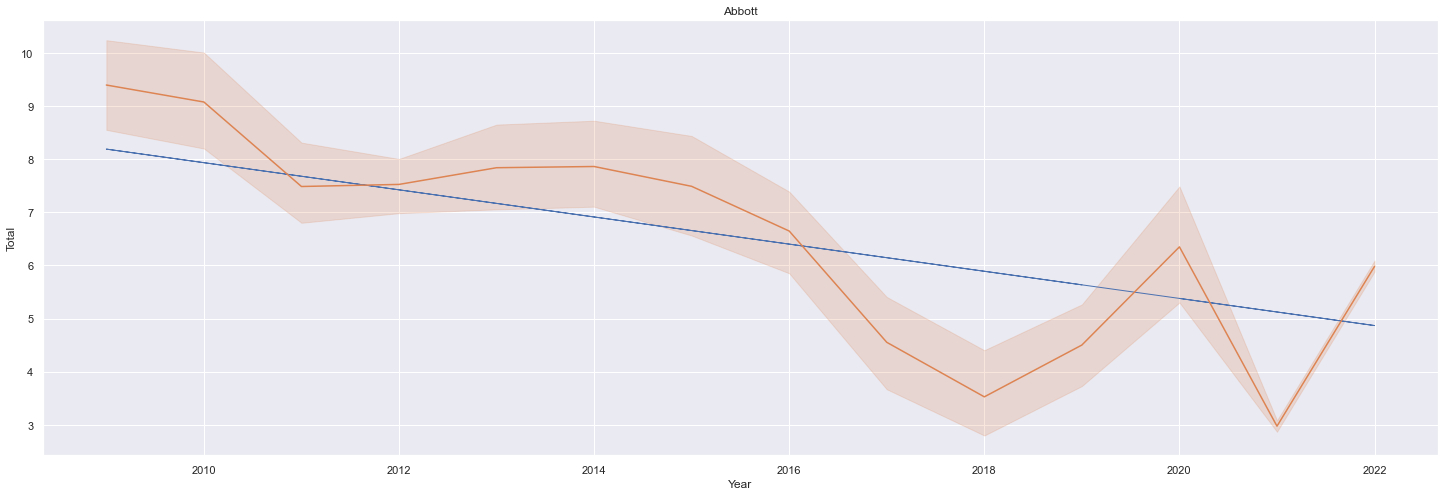

R2-waarde:  0.0632795043188279


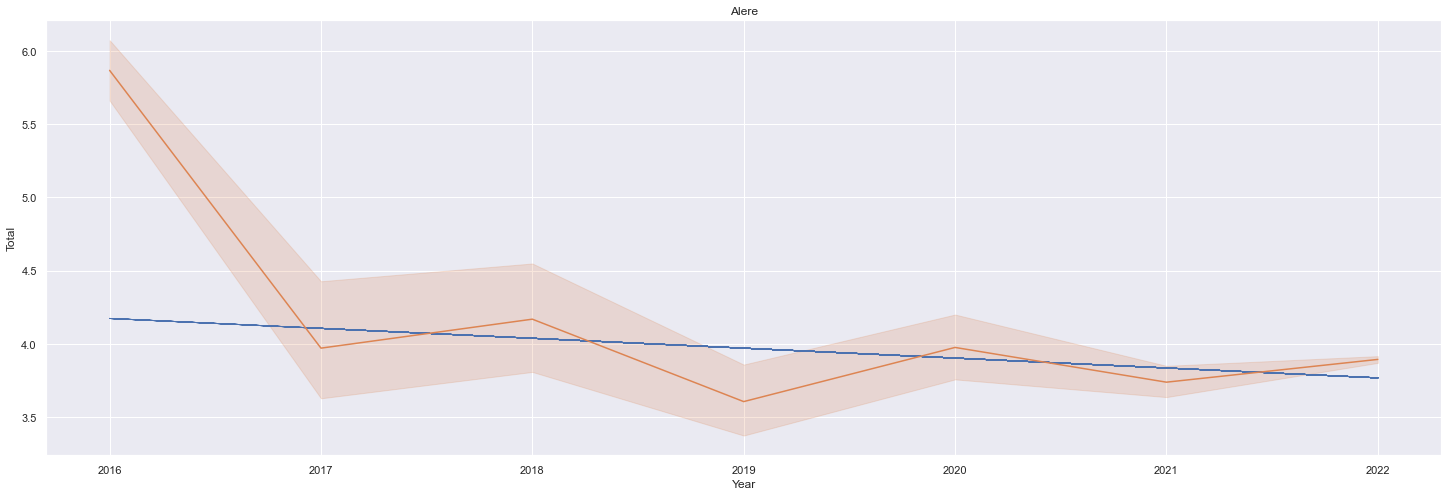

R2-waarde:  0.025232628084044917


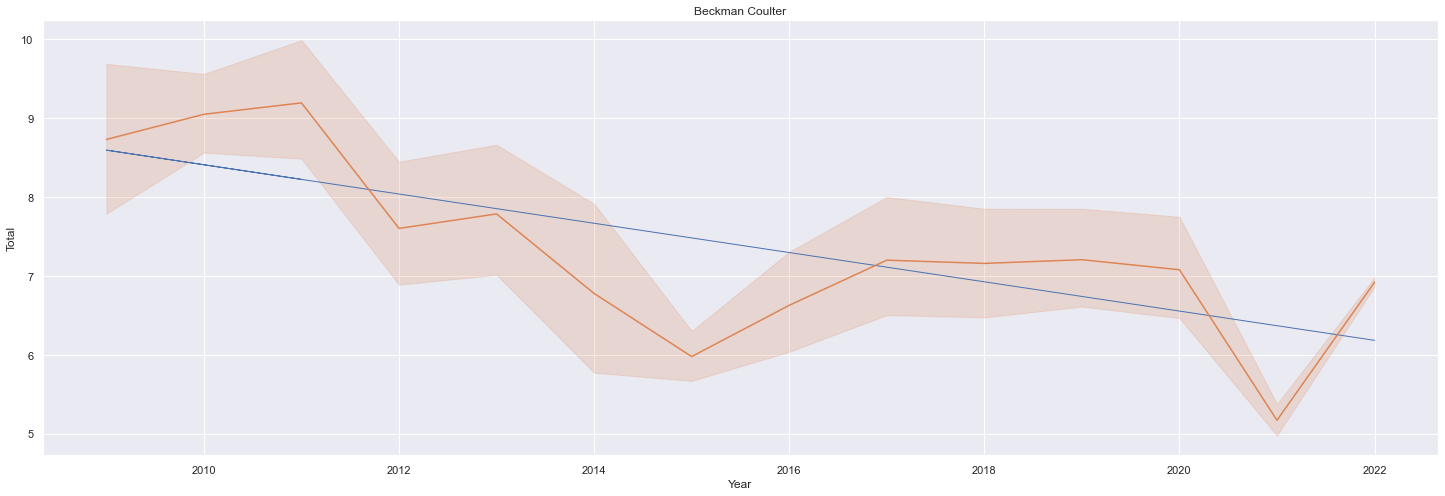

R2-waarde:  0.05213281499680178


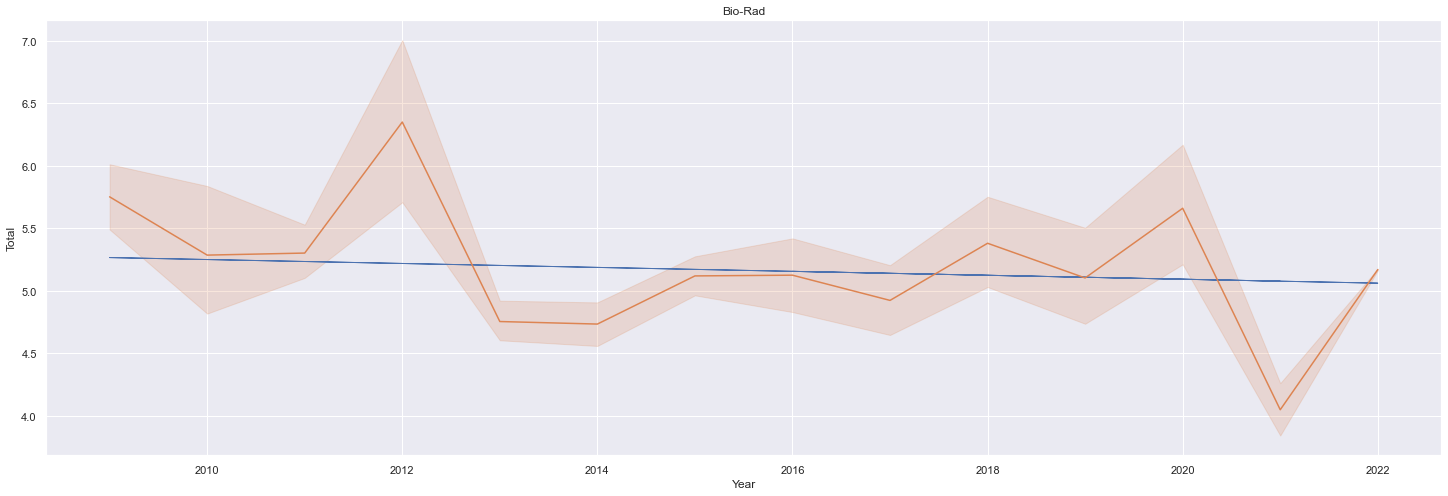

R2-waarde:  0.001538043114691412


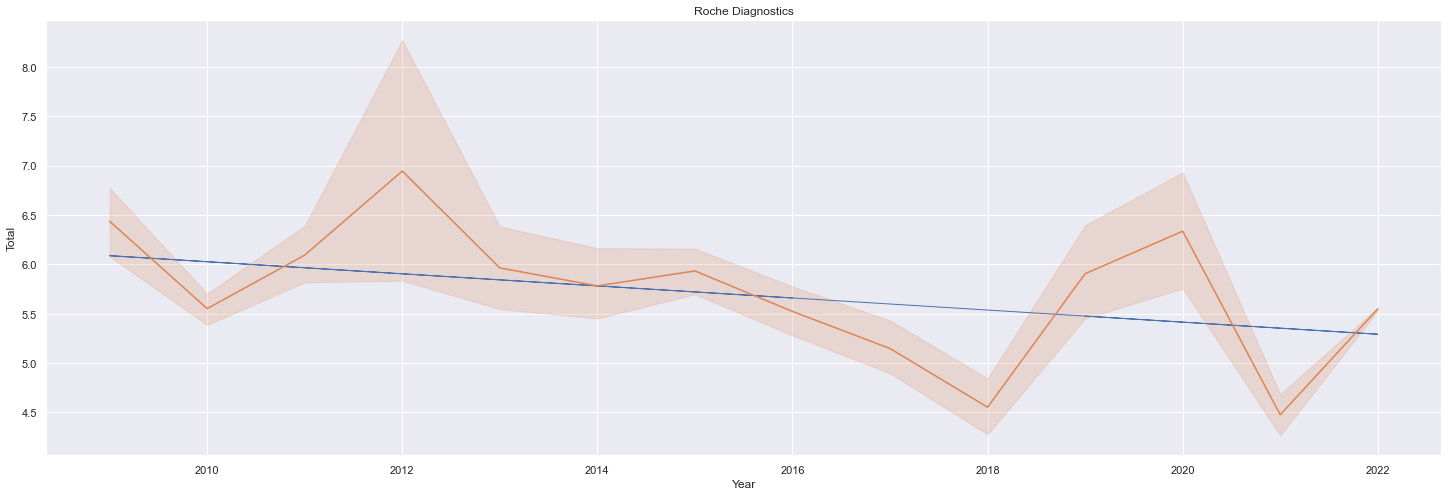

R2-waarde:  0.00801193768265196


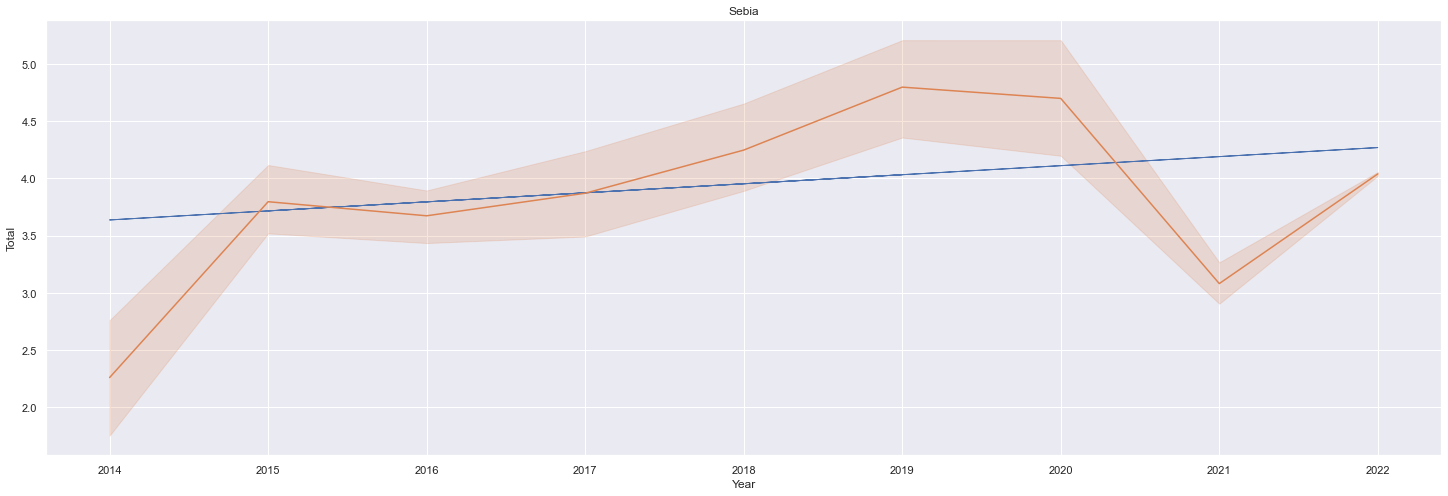

R2-waarde:  0.006491185166402125


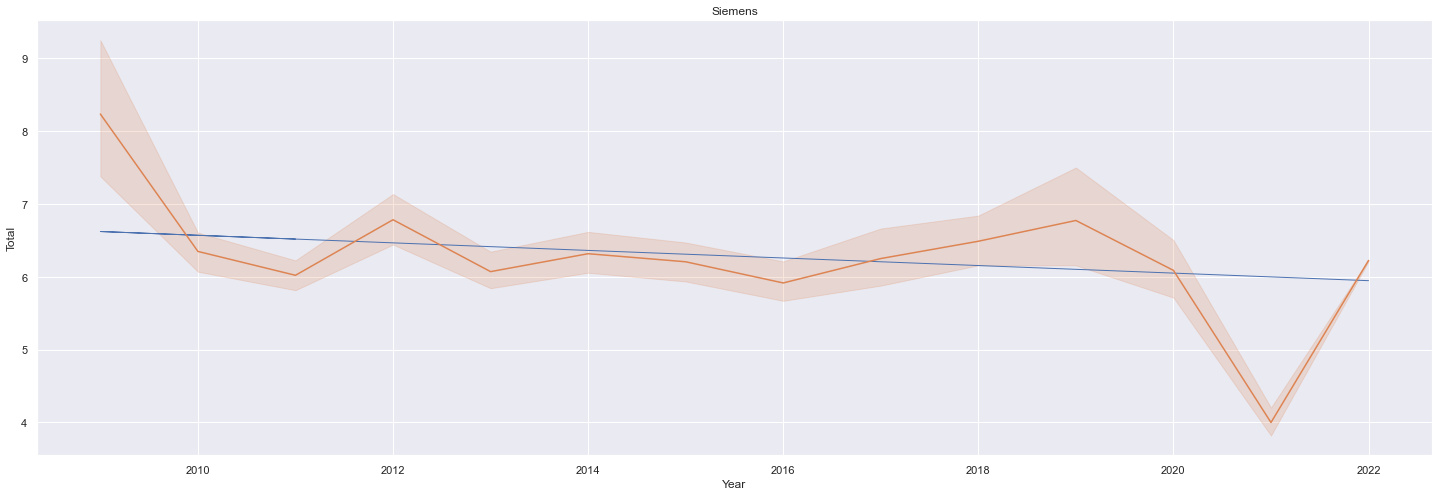

R2-waarde:  0.009078617308123649


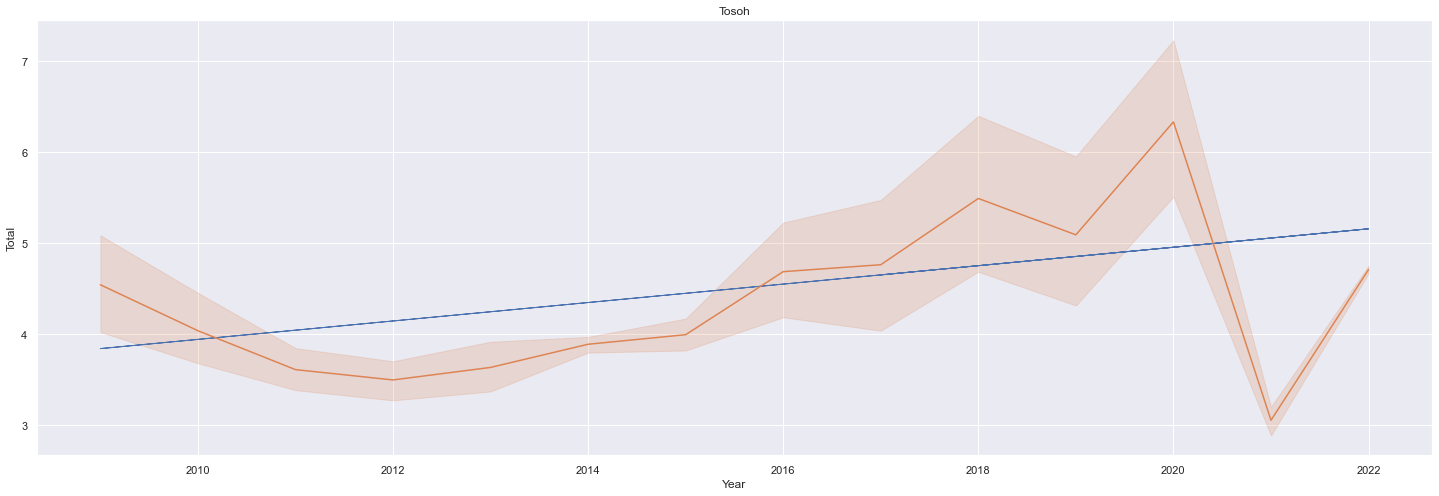

R2-waarde:  0.026856709280968394


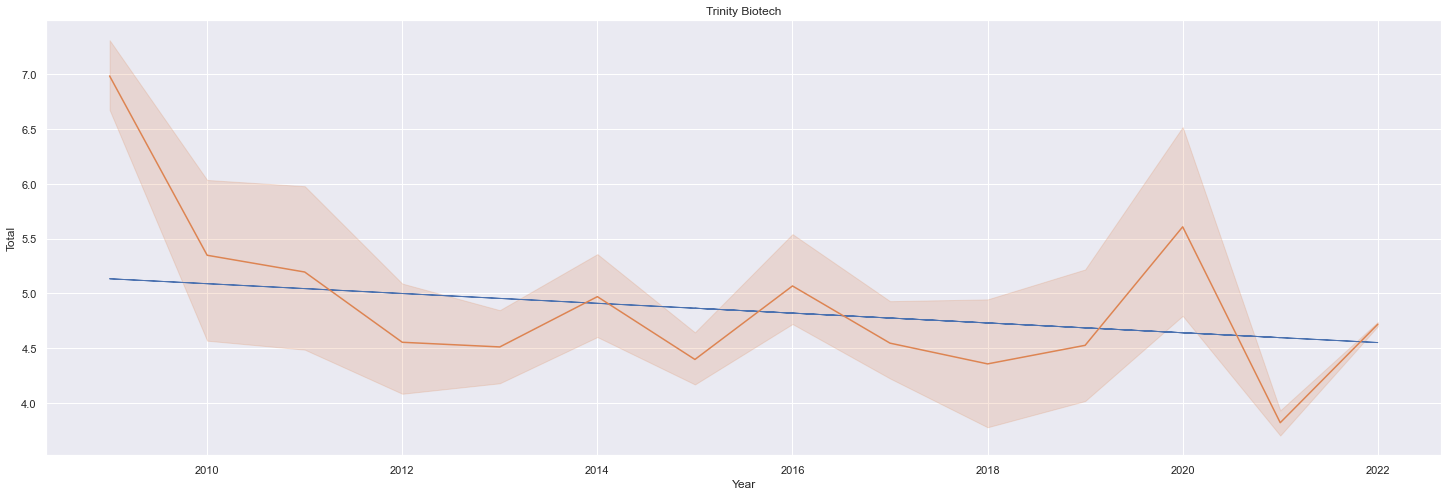

R2-waarde:  0.008781842296480713


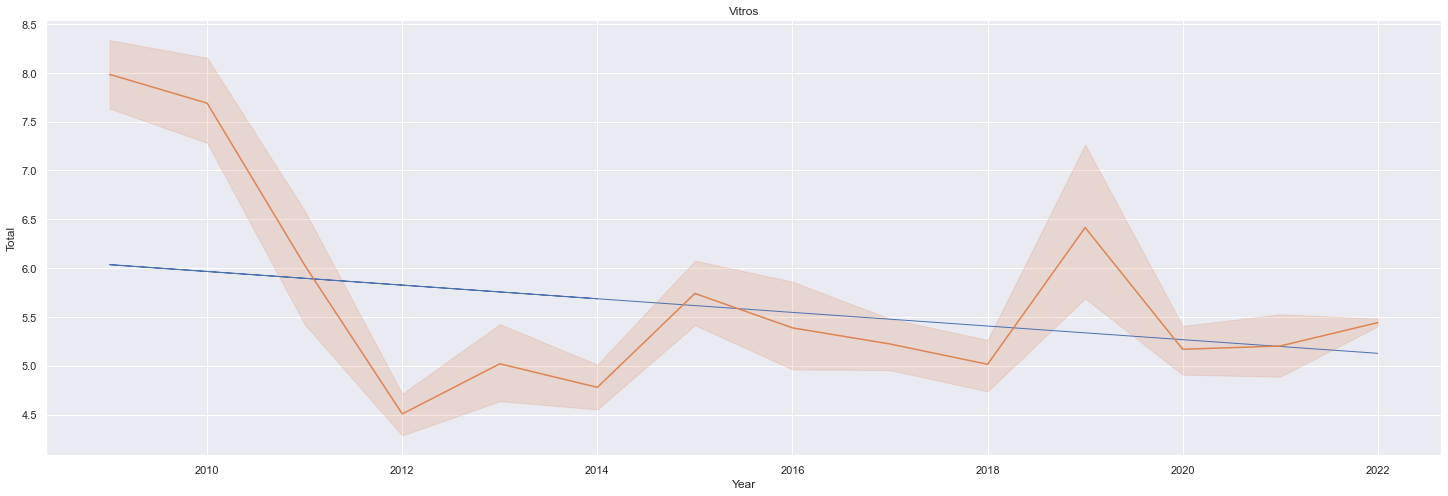

R2-waarde:  0.02772568042923207


In [24]:
for name, data in df_test:
    tempdf = data[['Year', 'Total']]
    
    X = tempdf.iloc[:, :-1].values
    Y = tempdf.iloc[:, 1].values
    
    # from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train, Y_train)    
    predicted_values = model.predict(X_test)

    predicted_df= pd.DataFrame(predicted_values, columns=["Total"])
    predicted_df["Year"] = "2022"
    tempdf = pd.concat([tempdf, predicted_df], axis=0, ignore_index=True)
    
    plt.plot(X_test,model.coef_ * X_test + model.intercept_, linewidth=1)
    sns.set(rc = {'figure.figsize':(25,8)})
    l = sns.lineplot(x='Year', y='Total', data=tempdf)
    l.set_title(name)
    plt.show()
    #print R2 waarde
    print('R2-waarde:',model.score(X,Y))

# Evaluation
Zoals te zien is de R2 waarde laag. Dit betekent dat dit model niet bruikbaar is.